In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

In [2]:
data = pd.read_csv('winequality-red.csv')

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Preprocessing Data

In [4]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [5]:
label_quality = LabelEncoder()

In [6]:
data['quality'] = label_quality.fit_transform(data['quality'])

In [7]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

<Axes: ylabel='count'>

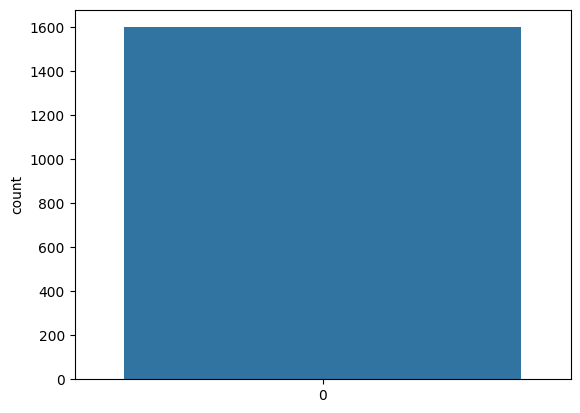

In [8]:
sns.countplot(data['quality'])

In [9]:
X = data.drop('quality', axis = 1)
y = data['quality']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
sc = StandardScaler()

In [12]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Random Forest Classifier¶

In [13]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [14]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.68      0.40      0.51        47

    accuracy                           0.88       320
   macro avg       0.79      0.69      0.72       320
weighted avg       0.87      0.88      0.87       320



In [15]:
print(confusion_matrix(y_test, pred_rfc))

[[264   9]
 [ 28  19]]


# Cross Validation Score for random forest

In [16]:
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.914800688976378

# KNN with CV

In [17]:
scores=[]

for i in range(1,40):
    model=KNeighborsClassifier(i)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    scores.append(accuracy_score(y_test,pred))

In [18]:
KNN_model=KNeighborsClassifier(11)
KNN_model.fit(X_train,y_train)
pred=KNN_model.predict(X_test)
accuracy_score(y_test,pred)

0.884375

# Bagging

In [19]:
bg = BaggingClassifier(n_estimators=200)
bg.fit(X_train, y_train)
pred_bg = bg.predict(X_test)

In [20]:
print(classification_report(y_test, pred_bg))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       273
           1       0.57      0.36      0.44        47

    accuracy                           0.87       320
   macro avg       0.73      0.66      0.68       320
weighted avg       0.85      0.87      0.85       320



In [21]:
print(confusion_matrix(y_test, pred_bg))

[[260  13]
 [ 30  17]]


# Boosting

In [22]:
bt = BaggingClassifier(n_estimators=200)
bt.fit(X_train, y_train)
pred_bt = bt.predict(X_test)

In [23]:
print(classification_report(y_test, pred_bt))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       273
           1       0.55      0.36      0.44        47

    accuracy                           0.86       320
   macro avg       0.72      0.66      0.68       320
weighted avg       0.85      0.86      0.85       320



In [24]:
print(confusion_matrix(y_test, pred_bt))

[[259  14]
 [ 30  17]]


# Logistic Regression

In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

In [26]:
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [27]:
print(confusion_matrix(y_test, pred_lr))

[[268   5]
 [ 35  12]]
